In [71]:
## 이슈 작업 : 다이소 및 이마트 등 강아지 용품점으로 나옴 / 사람 약국이 동물 약국으로 표기됨.

In [72]:
import pandas as pd
import numpy as np

In [73]:
test = pd.read_csv('1.CSV')

In [74]:
test.isnull().sum()

시설명             21867
카테고리1           21867
카테고리2           21867
카테고리3           21867
시도 명칭           21867
시군구 명칭          21867
법정읍면동명칭         21867
리 명칭            23929
번지              21867
도로명 이름          21868
건물 번호           21868
위도              21867
경도              21867
우편번호            21867
도로명주소           21868
지번주소            21867
전화번호            21867
홈페이지            21867
휴무일             21867
운영시간            21867
주차 가능여부         21867
입장(이용료)가격 정보    21867
반려동물 동반 가능정보    21867
반려동물 전용 정보      21867
입장 가능 동물 크기     21867
반려동물 제한사항       21867
장소(실내) 여부       21867
장소(실외)여부        21867
기본 정보_장소설명      21867
애견 동반 추가 요금     21867
최종작성일           21867
dtype: int64

In [75]:
test.columns

Index(['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '번지', '도로명 이름', '건물 번호', '위도', '경도', '우편번호', '도로명주소', '지번주소', '전화번호',
       '홈페이지', '휴무일', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보',
       '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일'],
      dtype='object')

In [76]:
temp = test.copy()

In [77]:
temp = temp[['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭','위도', '경도','반려동물 동반 가능정보']]

In [78]:
temp.head()

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,위도,경도,반려동물 동반 가능정보
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
temp2 = temp.rename(columns={'시설명':'Company',
                             '카테고리1': 'Category1',
                             '카테고리2' : 'Category2',
                             '카테고리3': 'Category3',
                             '시도 명칭' : 'City',
                             '시군구 명칭' : 'Gu',
                             '법정읍면동명칭':'Dong',
                             '위도' : 'Y',
                             '경도' : 'X',
                             '반려동물 동반 가능정보':'accompany'})

In [80]:
temp2 = temp2.dropna()

In [81]:
temp3 = temp2[temp2['accompany'].str.contains('가능')].copy()
temp3 = temp3[temp3['City'].str.contains('서울')]

In [82]:
# null 위치 행 위치 찾기.
null_rows = temp3[temp3.isnull().any(axis=1)].copy
null_rows

<bound method NDFrame.copy of Empty DataFrame
Columns: [Company, Category1, Category2, Category3, City, Gu, Dong, Y, X, accompany]
Index: []>

In [83]:
# null값 제거
temp3 = temp3.dropna()

In [84]:
# 약국  -----------------

In [85]:
uniq_pharmacy = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_pharmacy = uniq_pharmacy[uniq_pharmacy['Category3'].str.contains('약국')]

In [86]:
uniq_pharmacy['Counts'] = uniq_pharmacy.groupby(['Gu','Dong']).transform('size')

In [87]:
uniq_pharmacy['Y'] = uniq_pharmacy.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_pharmacy['X'] = uniq_pharmacy.groupby(['Gu','Dong'])['X'].transform('median')

In [88]:
# 카피
uniq_pharmacy_Count = uniq_pharmacy.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()

In [89]:
# 동물 약국
Animal_pharmacy_Count = uniq_pharmacy_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_pharmacy_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts


In [90]:
temp3.columns
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [91]:
# 카페 작업 -----------------

In [92]:
uniq_Cafe = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Cafe = uniq_Cafe[uniq_Cafe['Category3'].str.contains('카페')]

In [93]:
uniq_Cafe['Counts'] = uniq_Cafe.groupby(['Gu','Dong']).transform('size')

In [94]:
uniq_Cafe['Y'] = uniq_Cafe.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Cafe['X'] = uniq_Cafe.groupby(['Gu','Dong'])['X'].transform('median')

In [95]:
# 카피
uniq_Cafe_Count = uniq_Cafe.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Cafe_Count.head()

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,중구,신당동,반려동물업,반려동물식당카페,카페,37.563305,127.016417,1
1,종로구,인사동,반려동물업,반려동물식당카페,카페,37.571829,126.986787,1
2,종로구,동숭동,반려동물업,반려동물식당카페,카페,37.580098,127.003684,1
3,강서구,염창동,반려동물업,반려동물식당카페,카페,37.549923,126.874825,1
4,관악구,봉천동,반려동물업,반려동물식당카페,카페,37.487661,126.932624,3


In [96]:
# 카페
Animal_Cafe_Count = uniq_Cafe_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Cafe_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,논현동,반려동물업,반려동물식당카페,카페,37.513561,127.032936,7
1,강남구,대치동,반려동물업,반려동물식당카페,카페,37.500982,127.053160,2
2,강남구,삼성동,반려동물업,반려동물식당카페,카페,37.509617,127.054664,1
3,강남구,신사동,반려동물업,반려동물식당카페,카페,37.522567,127.024464,5
4,강남구,역삼동,반려동물업,반려동물식당카페,카페,37.503368,127.034180,6
...,...,...,...,...,...,...,...,...
68,중구,명동,반려동물업,반려동물식당카페,카페,37.560094,126.986249,2
69,중구,신당동,반려동물업,반려동물식당카페,카페,37.563305,127.016417,1
70,중구,을지로동,반려동물업,반려동물식당카페,카페,37.565329,126.992033,1
71,중랑구,면목동,반려동물업,반려동물식당카페,카페,37.577319,127.088103,2


In [97]:
temp3.columns
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [98]:
# 병원 작업 -----------------

In [99]:
uniq_Hospital = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Hospital = uniq_Hospital[uniq_Hospital['Category3'].str.contains('병원')]

In [100]:
uniq_Hospital['Counts'] = uniq_Hospital.groupby(['Gu','Dong']).transform('size')

In [101]:
uniq_Hospital['Y'] = uniq_Hospital.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Hospital['X'] = uniq_Hospital.groupby(['Gu','Dong'])['X'].transform('median')

In [102]:
# 카피
uniq_Hospital_Count = uniq_Hospital.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Hospital_Count.head()

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,용산구,보광동,반려동물업,반려의료,동물병원,37.527421,126.999988,2
1,강서구,마곡동,반려동물업,반려의료,동물병원,37.559040,126.824284,6
2,관악구,봉천동,반려동물업,반려의료,동물병원,37.481748,126.955167,15
3,금천구,독산동,반려동물업,반려의료,동물병원,37.467025,126.899552,9
4,중랑구,중화동,반려동물업,반려의료,동물병원,37.595322,127.079577,5


In [103]:
# 병원
Animal_Hospital_Count = uniq_Hospital_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Hospital_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,개포동,반려동물업,반려의료,동물병원,37.479200,127.050388,8
1,강남구,논현동,반려동물업,반려의료,동물병원,37.511013,127.028436,10
2,강남구,대치동,반려동물업,반려의료,동물병원,37.499616,127.057707,7
3,강남구,도곡동,반려동물업,반려의료,동물병원,37.490928,127.048948,2
4,강남구,삼성동,반려동물업,반려의료,동물병원,37.513713,127.043739,9
...,...,...,...,...,...,...,...,...
195,중랑구,면목동,반려동물업,반려의료,동물병원,37.585411,127.087383,12
196,중랑구,묵동,반려동물업,반려의료,동물병원,37.612596,127.077426,3
197,중랑구,상봉동,반려동물업,반려의료,동물병원,37.592443,127.072667,3
198,중랑구,신내동,반려동물업,반려의료,동물병원,37.607861,127.095644,5


In [104]:
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [105]:
# 미용 작업 -----------------

In [106]:
uniq_beauty = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_beauty = uniq_beauty[uniq_beauty['Category3'].str.contains('미용')]

In [107]:
uniq_beauty['Counts'] = uniq_beauty.groupby(['Gu','Dong']).transform('size')

In [108]:
uniq_beauty['Y'] = uniq_beauty.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_beauty['X'] = uniq_beauty.groupby(['Gu','Dong'])['X'].transform('median')

In [109]:
# 카피
uniq_beauty_Count = uniq_beauty.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_beauty_Count.head()

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,동대문구,제기동,반려동물업,반려동물 서비스,미용,37.585012,127.041494,1
1,중랑구,신내동,반려동물업,반려동물 서비스,미용,37.611233,127.096843,2
2,구로구,개봉동,반려동물업,반려동물 서비스,미용,37.504087,126.846696,1
3,광진구,구의동,반려동물업,반려동물 서비스,미용,37.545651,127.091635,6
4,중랑구,망우동,반려동물업,반려동물 서비스,미용,37.596325,127.100829,2


In [110]:
# 미용
Animal_beauty_Count = uniq_beauty_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_beauty_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,논현동,반려동물업,반려동물 서비스,미용,37.511109,127.032447,7
1,강남구,삼성동,반려동물업,반려동물 서비스,미용,37.514296,127.048706,9
2,강남구,신사동,반려동물업,반려동물 서비스,미용,37.528389,127.037236,1
3,강남구,역삼동,반려동물업,반려동물 서비스,미용,37.497101,127.038507,9
4,강남구,청담동,반려동물업,반려동물 서비스,미용,37.523088,127.049724,6
...,...,...,...,...,...,...,...,...
116,중랑구,면목동,반려동물업,반려동물 서비스,미용,37.582455,127.084380,8
117,중랑구,묵동,반려동물업,반려동물 서비스,미용,37.614046,127.079596,6
118,중랑구,상봉동,반려동물업,반려동물 서비스,미용,37.596730,127.087260,2
119,중랑구,신내동,반려동물업,반려동물 서비스,미용,37.611233,127.096843,2


In [111]:
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [112]:
# 반려동물 용품 작업 -----------------

In [113]:
uniq_store = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_store = uniq_store[uniq_store['Category3'].str.contains('용품')]

In [114]:
uniq_store['Counts'] = uniq_store.groupby(['Gu','Dong']).transform('size')

In [115]:
uniq_store['Y'] = uniq_store.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_store['X'] = uniq_store.groupby(['Gu','Dong'])['X'].transform('median')

In [116]:
# 카피
uniq_store_Count = uniq_store.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_store_Count.head()

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,양천구,신월동,반려동물업,반려동물 서비스,반려동물용품,37.521969,126.838448,14
1,영등포구,양평1동,반려동물업,반려동물 서비스,반려동물용품,37.524484,126.885437,4
2,중랑구,면목동,반려동물업,반려동물 서비스,반려동물용품,37.580899,127.087881,7
3,강남구,대치동,반려동물업,반려동물 서비스,반려동물용품,37.498320,127.054874,6
4,강남구,역삼동,반려동물업,반려동물 서비스,반려동물용품,37.498534,127.037023,16


In [117]:
# 용품
Animal_Store_Count = uniq_store_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Store_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,개포동,반려동물업,반려동물 서비스,반려동물용품,37.484223,127.058900,2
1,강남구,논현동,반려동물업,반려동물 서비스,반려동물용품,37.515131,127.027205,17
2,강남구,대치동,반려동물업,반려동물 서비스,반려동물용품,37.498320,127.054874,6
3,강남구,삼성동,반려동물업,반려동물 서비스,반려동물용품,37.512405,127.054132,13
4,강남구,신사동,반려동물업,반려동물 서비스,반려동물용품,37.525806,127.035153,8
...,...,...,...,...,...,...,...,...
179,중랑구,면목동,반려동물업,반려동물 서비스,반려동물용품,37.580899,127.087881,7
180,중랑구,묵동,반려동물업,반려동물 서비스,반려동물용품,37.613311,127.075912,4
181,중랑구,상봉동,반려동물업,반려동물 서비스,반려동물용품,37.598606,127.088600,6
182,중랑구,신내동,반려동물업,반려동물 서비스,반려동물용품,37.609762,127.106805,2


In [118]:
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [119]:
# 반려동물 용품 작업 -----------------

In [120]:
uniq_Hotel = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Hotel = uniq_Hotel[uniq_Hotel['Category3'].str.contains('위탁')]

In [121]:
uniq_Hotel['Counts'] = uniq_Hotel.groupby(['Gu','Dong']).transform('size')

In [122]:
uniq_Hotel['Y'] = uniq_Hotel.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Hotel['X'] = uniq_Hotel.groupby(['Gu','Dong'])['X'].transform('median')

In [123]:
# 카피
uniq_Hotel_Count = uniq_Hotel.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Hotel_Count.head()

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,역삼동,반려동물업,반려동물 서비스,위탁관리,37.499331,127.042877,1
1,강서구,화곡동,반려동물업,반려동물 서비스,위탁관리,37.554614,126.850714,1
2,강남구,대치동,반려동물업,반려동물 서비스,위탁관리,37.505090,127.059404,1
3,관악구,신림동,반려동물업,반려동물 서비스,위탁관리,37.488656,126.928064,1
4,송파구,송파동,반려동물업,반려동물 서비스,위탁관리,37.509709,127.105706,1


In [124]:
# 위탁관리
Animal_Hotel_Count = uniq_Hotel_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Hotel_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,대치동,반려동물업,반려동물 서비스,위탁관리,37.505090,127.059404,1
1,강남구,역삼동,반려동물업,반려동물 서비스,위탁관리,37.499331,127.042877,1
2,강서구,화곡동,반려동물업,반려동물 서비스,위탁관리,37.554614,126.850714,1
3,관악구,신림동,반려동물업,반려동물 서비스,위탁관리,37.488656,126.928064,1
4,서초구,반포동,반려동물업,반려동물 서비스,위탁관리,37.498507,126.999386,1
5,송파구,송파동,반려동물업,반려동물 서비스,위탁관리,37.509709,127.105706,1


In [125]:
import folium

# 함수 정의
def add_markers_to_map(dataframe, map_folium, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Category3'], max_width=200)
        folium.CircleMarker(location=[row['Y'], row['X']], popup=popup, color=color, fill=True, fill_color=color, fill_opacity=1, radius=3).add_to(map_folium)

# 지도 생성
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter')

# 각 데이터프레임에 따라 마커 추가
add_markers_to_map(Animal_pharmacy_Count, map_folium, 'green')
add_markers_to_map(Animal_Cafe_Count, map_folium, 'purple')
add_markers_to_map(Animal_Hospital_Count, map_folium, 'orange')
add_markers_to_map(Animal_beauty_Count, map_folium, 'darkred')
add_markers_to_map(Animal_Store_Count, map_folium, 'pink')

# 레이어 컨트롤(고정된 범례) 추가
folium.LayerControl().add_to(map_folium)

# 지도 출력
#map_folium
# map_folium.save("map_with_legend.html")

In [126]:
Animal_Hotel_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,대치동,반려동물업,반려동물 서비스,위탁관리,37.505090,127.059404,1
1,강남구,역삼동,반려동물업,반려동물 서비스,위탁관리,37.499331,127.042877,1
2,강서구,화곡동,반려동물업,반려동물 서비스,위탁관리,37.554614,126.850714,1
3,관악구,신림동,반려동물업,반려동물 서비스,위탁관리,37.488656,126.928064,1
4,서초구,반포동,반려동물업,반려동물 서비스,위탁관리,37.498507,126.999386,1
5,송파구,송파동,반려동물업,반려동물 서비스,위탁관리,37.509709,127.105706,1


In [127]:
import folium


def add_markers_to_map(dataframe, map_folium, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu']+' ' + row['Dong'] +' '+ row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.Marker(location=[row['Y'], row['X']],
                      popup=popup,
                      icon=folium.Icon(color=color, icon='circle')).add_to(map_folium)




map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


add_markers_to_map(Animal_Cafe_Count, map_folium, 'darkred')
add_markers_to_map(Animal_Hospital_Count, map_folium, 'green')
add_markers_to_map(Animal_beauty_Count, map_folium, 'purple')
add_markers_to_map(Animal_Store_Count, map_folium, 'orange')
add_markers_to_map(Animal_Hotel_Count, map_folium, 'blue')

# 범례 우측 상단에 고정.
legend_html = '''
     <div style="position: fixed; 
                 top: 10px; right: 10px; width: 200px; height: 130px; 
                 border:3px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.7; padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

map_folium.get_root().html.add_child(folium.Element(legend_html))
map_folium.save('Animal_.html')

#map_folium
#map_folium.save('Seoul_point_map_folium.html')

In [128]:
import folium


def add_markers_to_map(dataframe, map_folium, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu']+' ' + row['Dong'] +' '+ row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.CircleMarker(location=[row['Y'], row['X']],
                            popup=popup,
                            color=None,
                            fill=True,
                            fill_color=color,
                            fill_opacity=0.5,
                            radius=15,
                            stroke = False).add_to(map_folium)


map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


add_markers_to_map(Animal_Cafe_Count, map_folium, 'darkred')
add_markers_to_map(Animal_Hospital_Count, map_folium, 'green')
add_markers_to_map(Animal_beauty_Count, map_folium, 'purple')
add_markers_to_map(Animal_Store_Count, map_folium, 'orange')
add_markers_to_map(Animal_Hotel_Count, map_folium, 'blue')

legend_html = '''
     <div style="position: fixed; 
                 top: 10px; right: 10px; width: 200px; height: 130px; 
                 border:3px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.7; padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

map_folium.get_root().html.add_child(folium.Element(legend_html))
map_folium.save('Animal_.html')

#map_folium
#map_folium.save('Seoul_circle_map_folium')

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

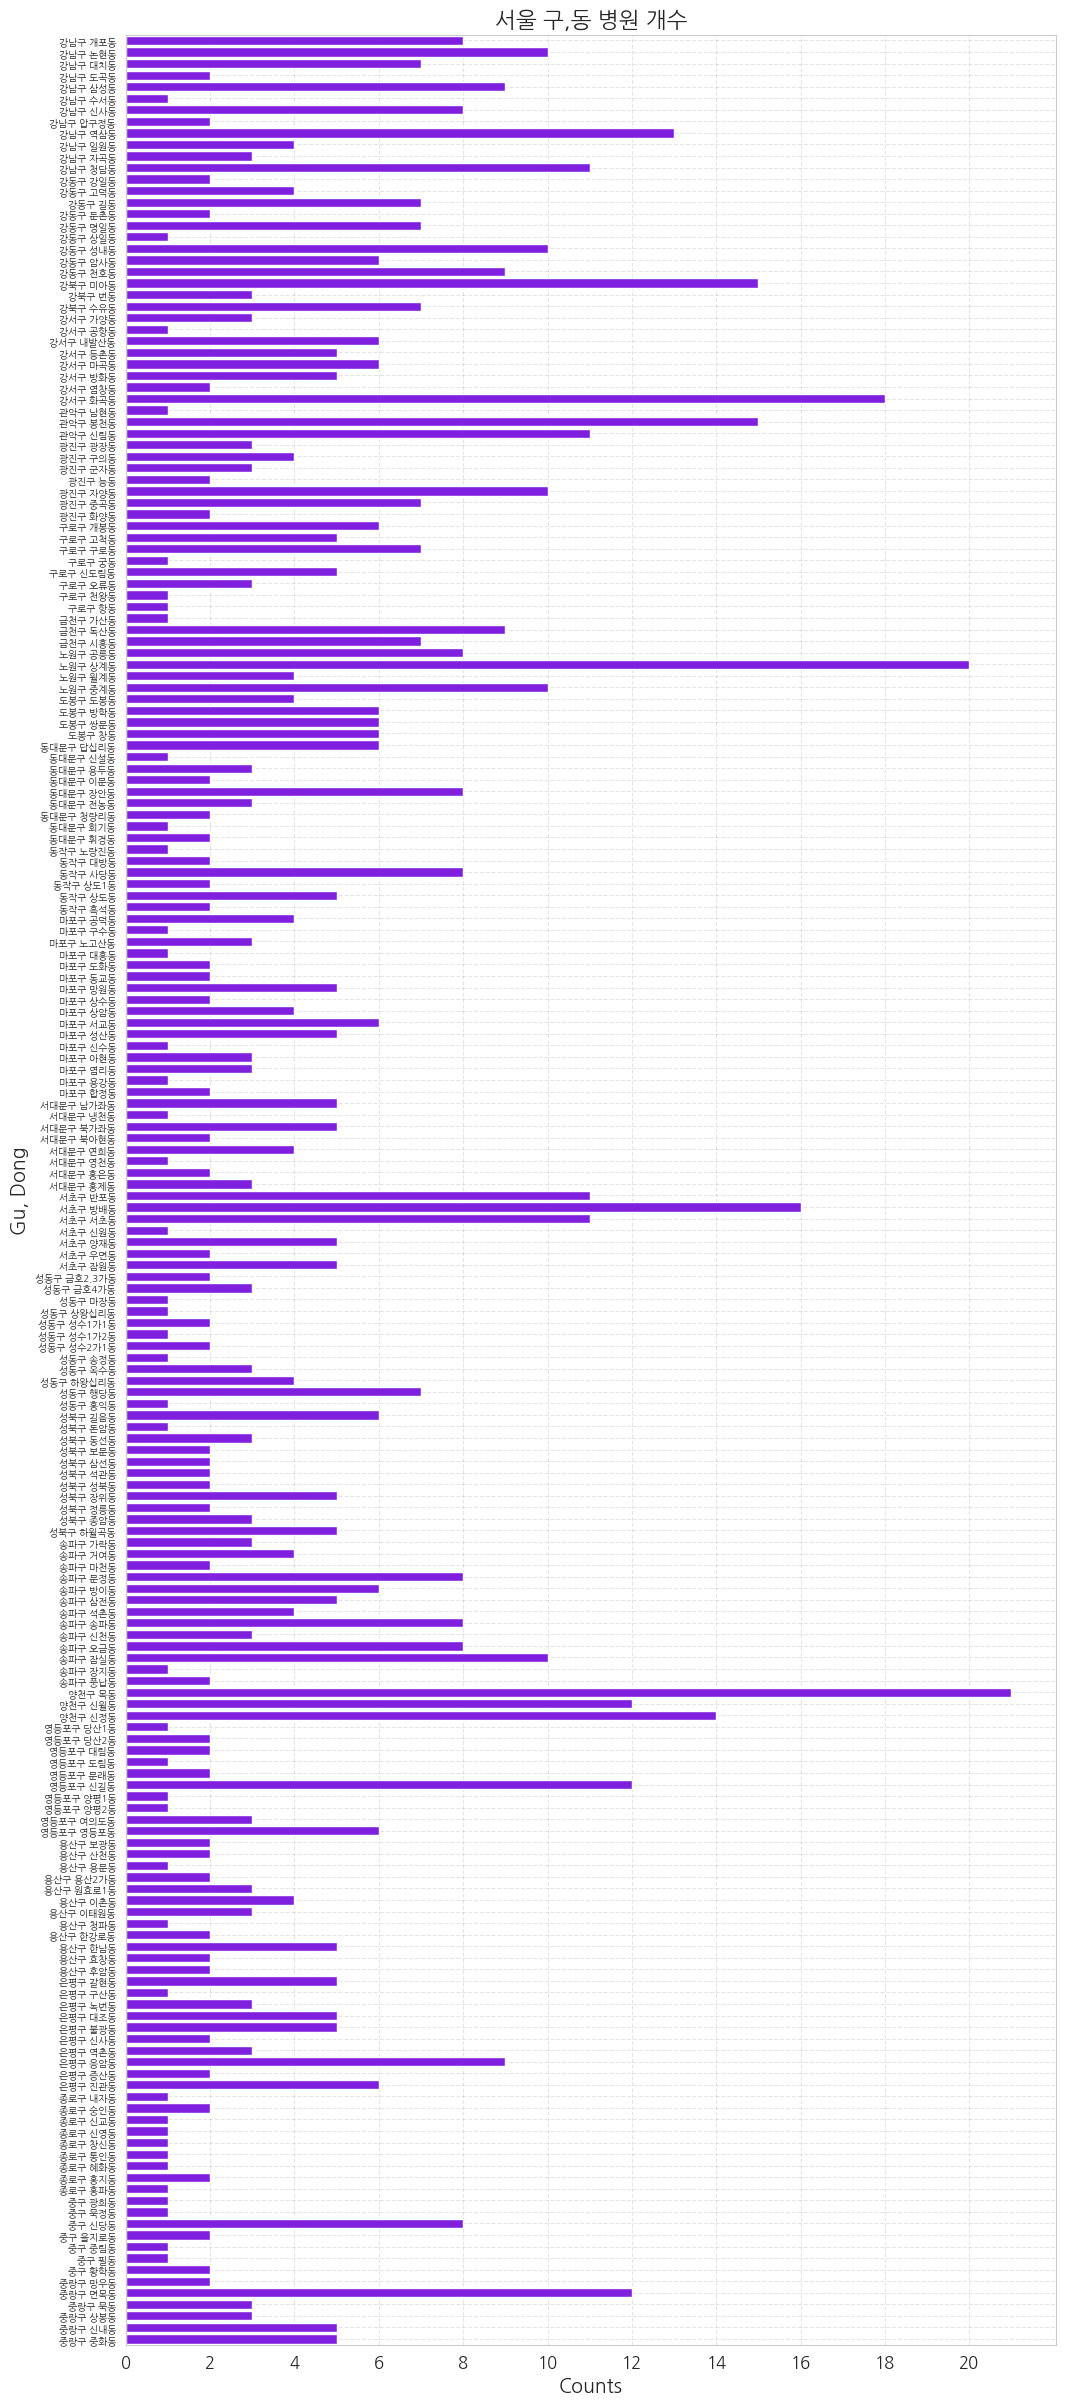

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30), facecolor='white')
ax = sns.barplot(x=Animal_Hospital_Count['Counts'], y=Animal_Hospital_Count['Gu'] + ' ' + Animal_Hospital_Count['Dong'], color='#7f00ff')
plt.xticks(range(0, int(Animal_Hospital_Count['Counts'].max()) + 1, 2), fontsize=12)  # x 레이블 간격을 2로 설정

sns.set_style("whitegrid")
plt.xlabel('Counts', fontsize=14)  # x 레이블 설정
plt.yticks(fontsize= 7)
plt.ylabel('Gu, Dong', fontsize=14)  # y 레이블 설정
plt.title('서울 구,동 병원 개수', fontsize=16)
plt.grid(True, axis='both', linestyle='--', alpha=0.1, color='black')  # 가로 및 세로 그리드 추가, 투명도 및 점선 설정
plt.show()

#plt.savefig('서울 행정별 병원 개수.png')

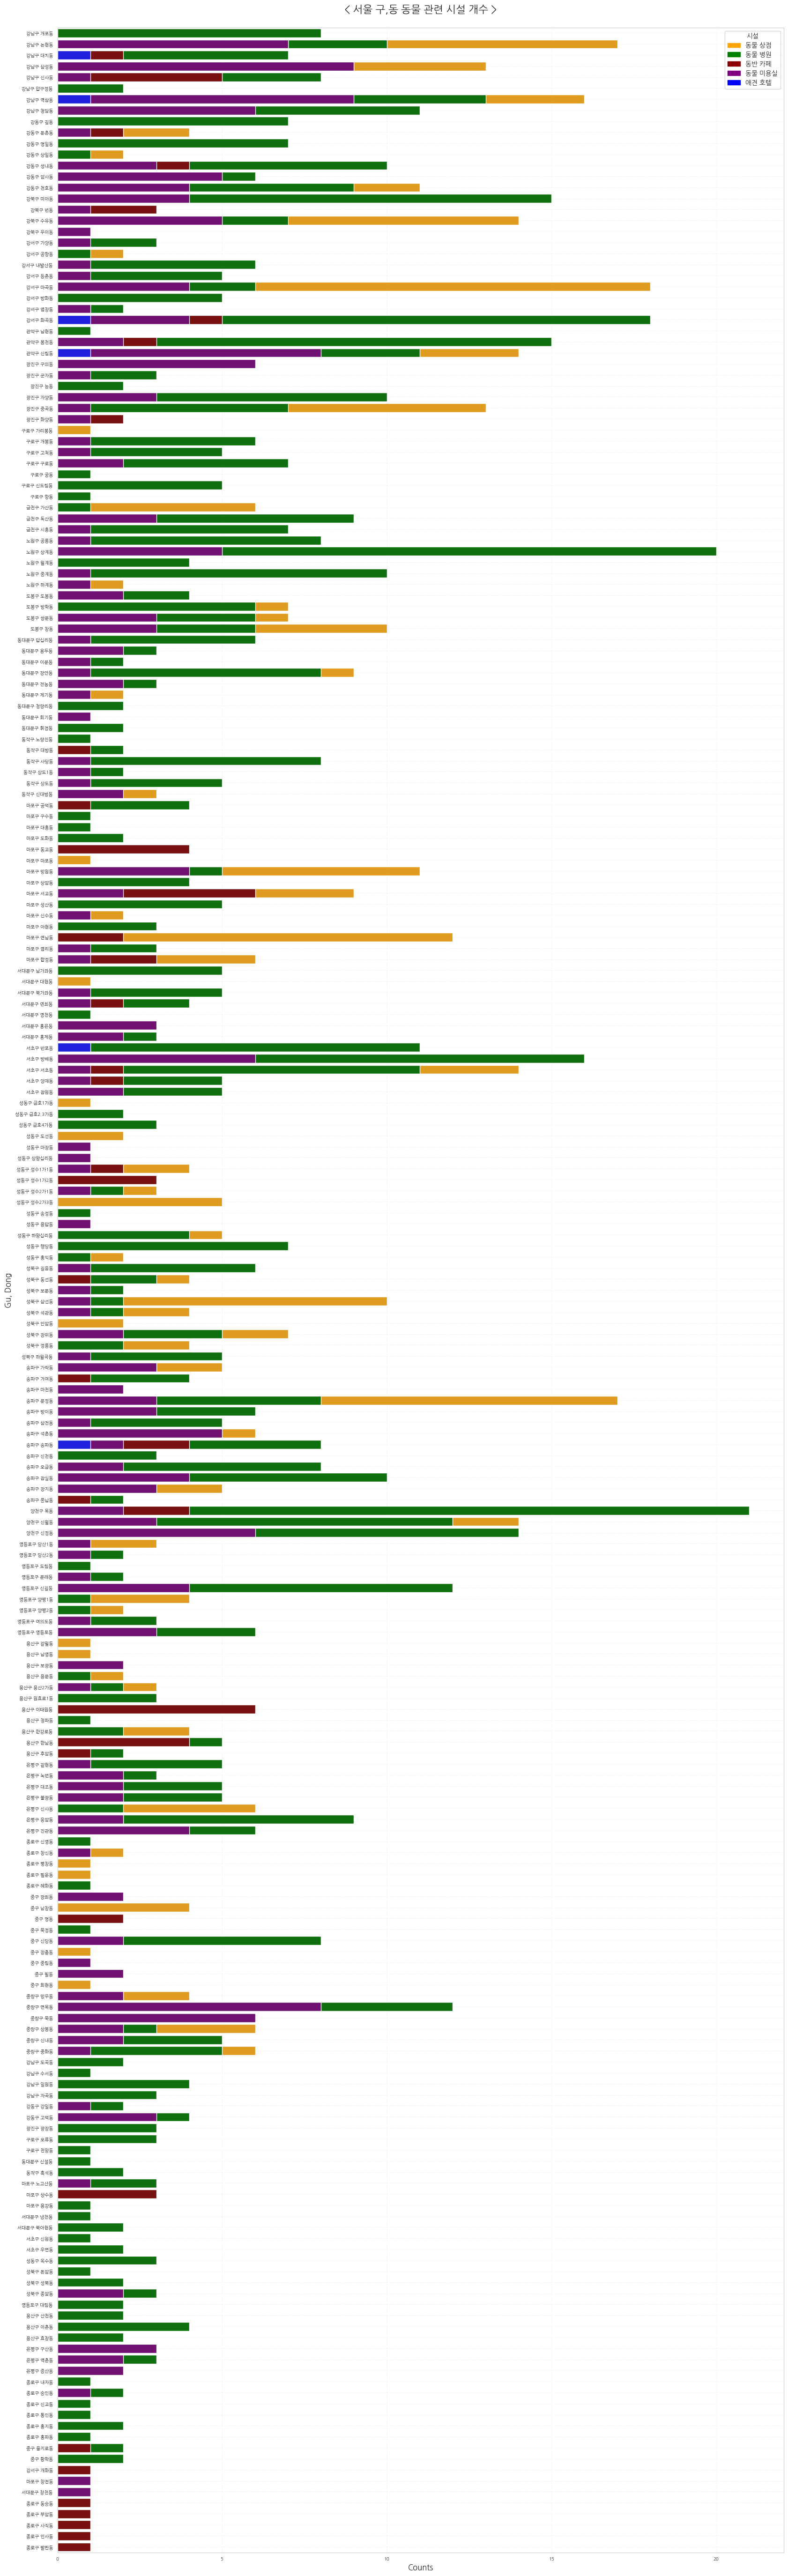

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터프레임과 색상을 매핑하는 사전을 생성합니다.
dataframes = [Animal_Store_Count, Animal_Hospital_Count , Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count ]
colors = ['orange','green','darkred','purple', 'blue']
dataframe_colors = dict(zip(range(len(dataframes)), colors))
facility_names = [ '동물 상점','동물 병원','동반 카페' ,'동물 미용실', '애견 호텔']

plt.figure(figsize=(20, 70))

# 각각의 Counts를 다른 색상 구/ 동 그룹화하여 표시합니다.
legend_labels = []
for idx, dataframe in enumerate(dataframes):
    ax = sns.barplot(x=dataframe['Counts'], y=dataframe['Gu'] + ' ' + dataframe['Dong'], color=dataframe_colors[idx])
    legend_labels.append(dataframe.index.name)

plt.xticks(range(0, max(max(df['Counts']) for df in dataframes) + 1, 5), fontsize=7)  # 간격 5
plt.xlabel('Counts', fontsize= 12)  # x 레이블 
plt.yticks(fontsize=7)
plt.ylabel('Gu, Dong', fontsize= 12)  # y 레이블 
plt.title('< 서울 구,동 동물 관련 시설 개수 >\n', fontsize=16)
plt.grid(True, axis='both', linestyle='--', alpha=0.2)  # 그리드 , 투명도 및 점선 설정

# 레전드에 현재 시설별 표시를 추가합니다.
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, facility_names, title='시설', loc='upper right', fontsize=10)

#plt.show()
#plt.savefig('서울 동물 관련 시설.png')

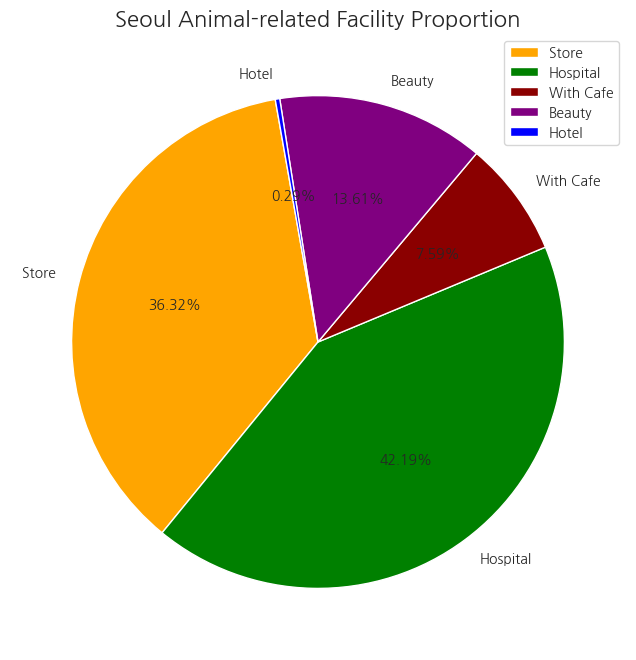

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터프레임과 색상을 매핑하는 사전을 생성합니다.
dataframes = [Animal_Store_Count, Animal_Hospital_Count, Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count]
colors = ['orange', 'green', 'darkred', 'purple', 'blue']
dataframe_colors = dict(zip(range(len(dataframes)), colors))
facility_names = ['Store', 'Hospital', 'With Cafe', 'Beauty', 'Hotel']

total_counts = [df['Counts'].sum() for df in dataframes]

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=facility_names, colors=colors, autopct='%1.2f%%', startangle=100) 

# 그래프 꾸미기
plt.title('Seoul Animal-related Facility Proportion', fontsize=16) 

# 그래프 보여주기
plt.legend(loc='upper right')  # 범례를 중앙에 위치시킵니다.
#plt.show()
#plt.savefig('서울 관련 시설 비중.png')

In [133]:

import folium
from folium.plugins import MarkerCluster


def add_markers_to_cluster(dataframe, marker_cluster, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu'] + ' ' + row['Dong'] + ' ' + row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.Marker(location=[row['Y'], row['X']],
                      popup=popup,
                      icon=folium.Icon(color=color)).add_to(marker_cluster)

# Folium 지도 생성
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(map_folium)

# 각 카테고리에 대해 마커 추가
add_markers_to_cluster(Animal_Cafe_Count, marker_cluster, 'darkred')
add_markers_to_cluster(Animal_Hospital_Count, marker_cluster, 'green')
add_markers_to_cluster(Animal_beauty_Count, marker_cluster, 'purple')
add_markers_to_cluster(Animal_Store_Count, marker_cluster, 'orange')
add_markers_to_cluster(Animal_Hotel_Count, marker_cluster, 'blue')

# 범례 추가
legend_html = '''
     <div style="position: fixed; 
                 top: 10px; right: 10px; width: 200px; height: 130px; 
                 border:3px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.7; padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

map_folium.get_root().html.add_child(folium.Element(legend_html))

#map_folium


In [134]:
Animal_Store_Count['Counts'].sum()+ Animal_Hospital_Count['Counts'].sum()+Animal_Cafe_Count['Counts'].sum()+Animal_beauty_Count['Counts'].sum()+Animal_Hotel_Count['Counts'].sum()

2043

In [135]:
import folium
from folium.plugins import MarkerCluster
import requests
import json

def add_markers_to_cluster(dataframe, marker_cluster, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu'] + ' ' + row['Dong'] + ' ' + row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.Marker(location=[row['Y'], row['X']],
                      popup=popup,
                      icon=folium.Icon(color=color)).add_to(marker_cluster)

# CartoDB dark_matter cartodbpositron 둘 중 하나가 적합해 보임.
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(map_folium)

# 각 카테고리에 대해 마커 추가
add_markers_to_cluster(Animal_Cafe_Count, marker_cluster, 'darkred')
add_markers_to_cluster(Animal_Hospital_Count, marker_cluster, 'green')
add_markers_to_cluster(Animal_beauty_Count, marker_cluster, 'purple')
add_markers_to_cluster(Animal_Store_Count, marker_cluster, 'orange')
add_markers_to_cluster(Animal_Hotel_Count, marker_cluster, 'blue')

# 범례 추가
legend_html = '''
     <div style="position: fixed; 
                 top: 10px; right: 10px; width: 200px; height: 130px; 
                 border:3px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.7; padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

legend_music = ''' 




'''

map_folium.get_root().html.add_child(folium.Element(legend_html))
map_folium.get_root().html.add_child(folium.Element(legend_music))

# 서울 행정구역 정보 추가
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
seoul_geo = r.json()

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map_folium)


#map_folium  #.save('test.html')

In [148]:
import folium
from folium.plugins import MarkerCluster
import requests
import json

def add_markers_to_cluster(dataframe, marker_cluster, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu'] + ' ' + row['Dong'] + ' ' + row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.Marker(location=[row['Y'], row['X']],
                      popup=popup,
                      icon=folium.Icon(color=color)).add_to(marker_cluster)

# CartoDB dark_matter cartodbpositron 둘 중 하나가 적합해 보임.
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(map_folium)

# 각 카테고리에 대해 마커 추가
add_markers_to_cluster(Animal_Cafe_Count, marker_cluster, 'darkred')
add_markers_to_cluster(Animal_Hospital_Count, marker_cluster, 'green')
add_markers_to_cluster(Animal_beauty_Count, marker_cluster, 'purple')
add_markers_to_cluster(Animal_Store_Count, marker_cluster, 'orange')
add_markers_to_cluster(Animal_Hotel_Count, marker_cluster, 'blue')

# 범례 추가
legend_html = '''
     <div style="position: fixed; 
                 top: 30px;
                 right: 10px; 
                 width: 200px;
                 height: 130px; 
                 border:3px solid grey;
                 z-index:9999; 
                 font-size:12px;
                 background-color:white;
                 opacity: 0.7;
                 padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

legend_music = ''' 
<!DOCTYPE html>
<html lang="ko">
    <head>
        <meta charset="UTF-8" />
        <title>음악 재생</title>
        <script src="http://cdnjs.cloudflare.com/ajax/libs/tone/14.8.49/Tone.min.js"></script>
    </head>
    <body>
        <button id="playButton">재생</button>
        <button id="stopButton">중지</button>

        <script>
            const playButton = document.getElementById('playButton');
            const stopButton = document.getElementById('stopButton');

            let isPlaying = false;

            playButton.addEventListener('click', async () => {
                if (!isPlaying) {
                    await Tone.start();
                    Tone.Transport.start();
                    isPlaying = true;
                }
            });

            stopButton.addEventListener('click', () => {
                Tone.Transport.stop();
                isPlaying = false;
            });

            const drum = new Tone.MembraneSynth().toDestination();
            const hat = new Tone.MetalSynth({
                envelope: {
                    attack: 0.01,
                    decay: 0.1,
                    release: 0.3,
                },
            }).toDestination();
            hat.volume.value = -20;

            new Tone.Loop((t) => {
                drum.triggerAttackRelease('C1', '8n', t);
                drum.triggerAttackRelease('C1', '8n', t + 0.5);
                drum.triggerAttackRelease('C1', '8n', t + 1);
                drum.triggerAttackRelease('C1', '8n', t + 1.5);
                hat.triggerAttackRelease('C1', '8n', t + 1.73);
                hat.triggerAttackRelease('C1', '8n', t + 1.86);
            }, 2).start(0);
            drum.volume.value = -20;

            const effect = new Tone.Reverb(3).toDestination();
            const effect2 = new Tone.FrequencyShifter(4).toDestination();

            const melody = new Tone.PolySynth().toDestination();
            melody
                .set({
                    volume: -25,
                    oscillator: { type: 'sawtooth' },
                    envelope: {
                        attack: 0.01,
                        decay: 0.1,
                        release: 5,
                    },
                })
                .connect(effect2)
                .connect(effect);

            new Tone.Loop((t) => {
                melody.triggerAttackRelease(['C2', 'C4'], '8n', t);
                melody.triggerAttackRelease('E4', '16n', t + 0.4);
                melody.triggerAttackRelease('F4', '16n', t + 0.8);
                melody.triggerAttackRelease('E4', '16n', t + 1.28);
                
            }, 2).start(0);

            
        </script>
    </body>
</html>




'''

map_folium.get_root().html.add_child(folium.Element(legend_html))
map_folium.get_root().html.add_child(folium.Element(legend_music))

# 서울 행정구역 정보 추가
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
seoul_geo = r.json()

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map_folium)


map_folium.save('test_music1.html')